---
title: cheg325 homework 6 SIS 11.3-23
author: k. wodehouse
date: today
format:
    html:
        self-contained: true
---

# a

using this data point we can fit our data to the van laar model using the equlibrium expression

$$
x_i \gamma_i P^{\text{vap}}_i = y_i P_{\text{total}}
$$

$$
\gamma_i  = \frac{y_i P_{\text{total}}}{x_i P^{\text{vap}}_i}
$$

something very similar came up earlier on the homework, but this one is even easier since we don't need to worry about having activity coefficients on each side. remembering the van laar model

$$
\ln \gamma_1 = \left[\frac{\alpha}{\left(1 + \frac{\alpha x_1}{\beta(1-x_1)}\right)^2}\right]
$$

$$
\ln \gamma_2 = \left[\frac{\beta}{\left(1 + \frac{\beta(1-x_1)}{\alpha x_1}\right)^2}\right]
$$

this is 2 equations and 2 unknowns. this can be solved with excel solver or fsolve or mathematica. or, we could do algebra to get a reusable equation for an exam cheat sheet perhaps or something

<img src="q41.png" alt="math" width="700"/>

or we could have used equation (9.5-10)

$$
\alpha = \left( 1 + \frac{x_2 \ln \gamma_2}{x_1 \ln \gamma_1} \right)^2 \ln \gamma_1
$$

$$
\beta = \left( 1 + \frac{x_1 \ln \gamma_1}{x_2 \ln \gamma_2} \right)^2 \ln \gamma_2
$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x1 = 0.3455
x2 = 1-x1
y1 = 0.4538
y2 = 1-y1
pvap1 = 0.2622
pvap2 = 0.2014
ptotal = 0.2555

gamma1 = y1 * ptotal / (x1 * pvap1)
gamma2 = y2 * ptotal / (x2 * pvap2)

realGamma1 = np.log(gamma1)
realGamma2 = np.log(gamma2)

alpha = (realGamma1*x1 + realGamma2*x2)**2  / (realGamma1 * x1**2)
beta = (realGamma1*x1 + realGamma2*x2)**2  / (realGamma2 * x2**2)

print(f'alpha: {alpha:.3f}')
print(f'beta: {beta:.3f}')

def vanlaar_gamma1(x1):
    x2 = 1-x1
    return np.exp(alpha/((1 + (alpha*x1)/(beta*x2))**2))

def vanlaar_gamma2(x1):
    x2 = 1-x1
    return np.exp(beta/((1 + (beta*x2)/(alpha*x1))**2))


alpha: 0.510
beta: 0.615


now making our graphs

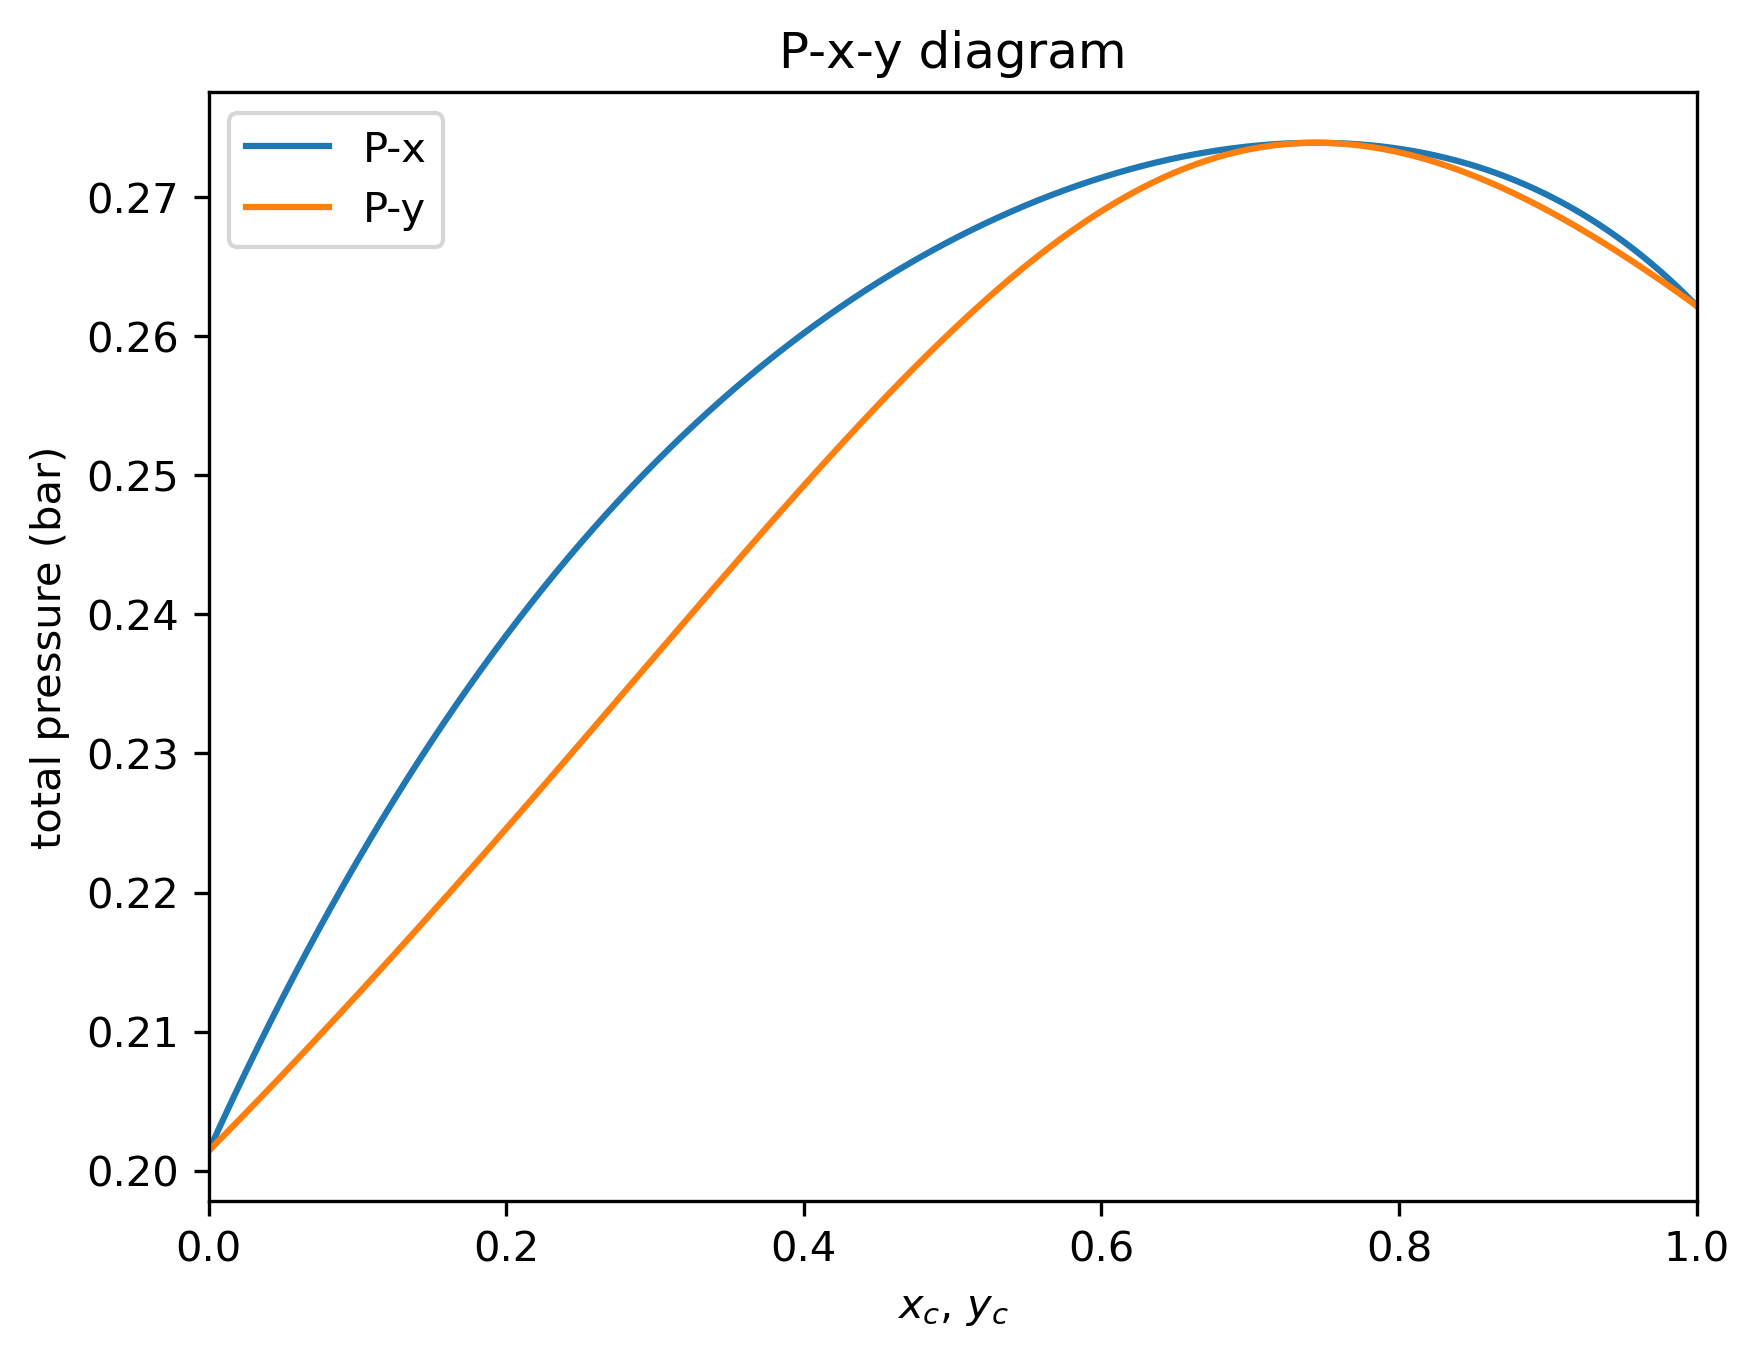

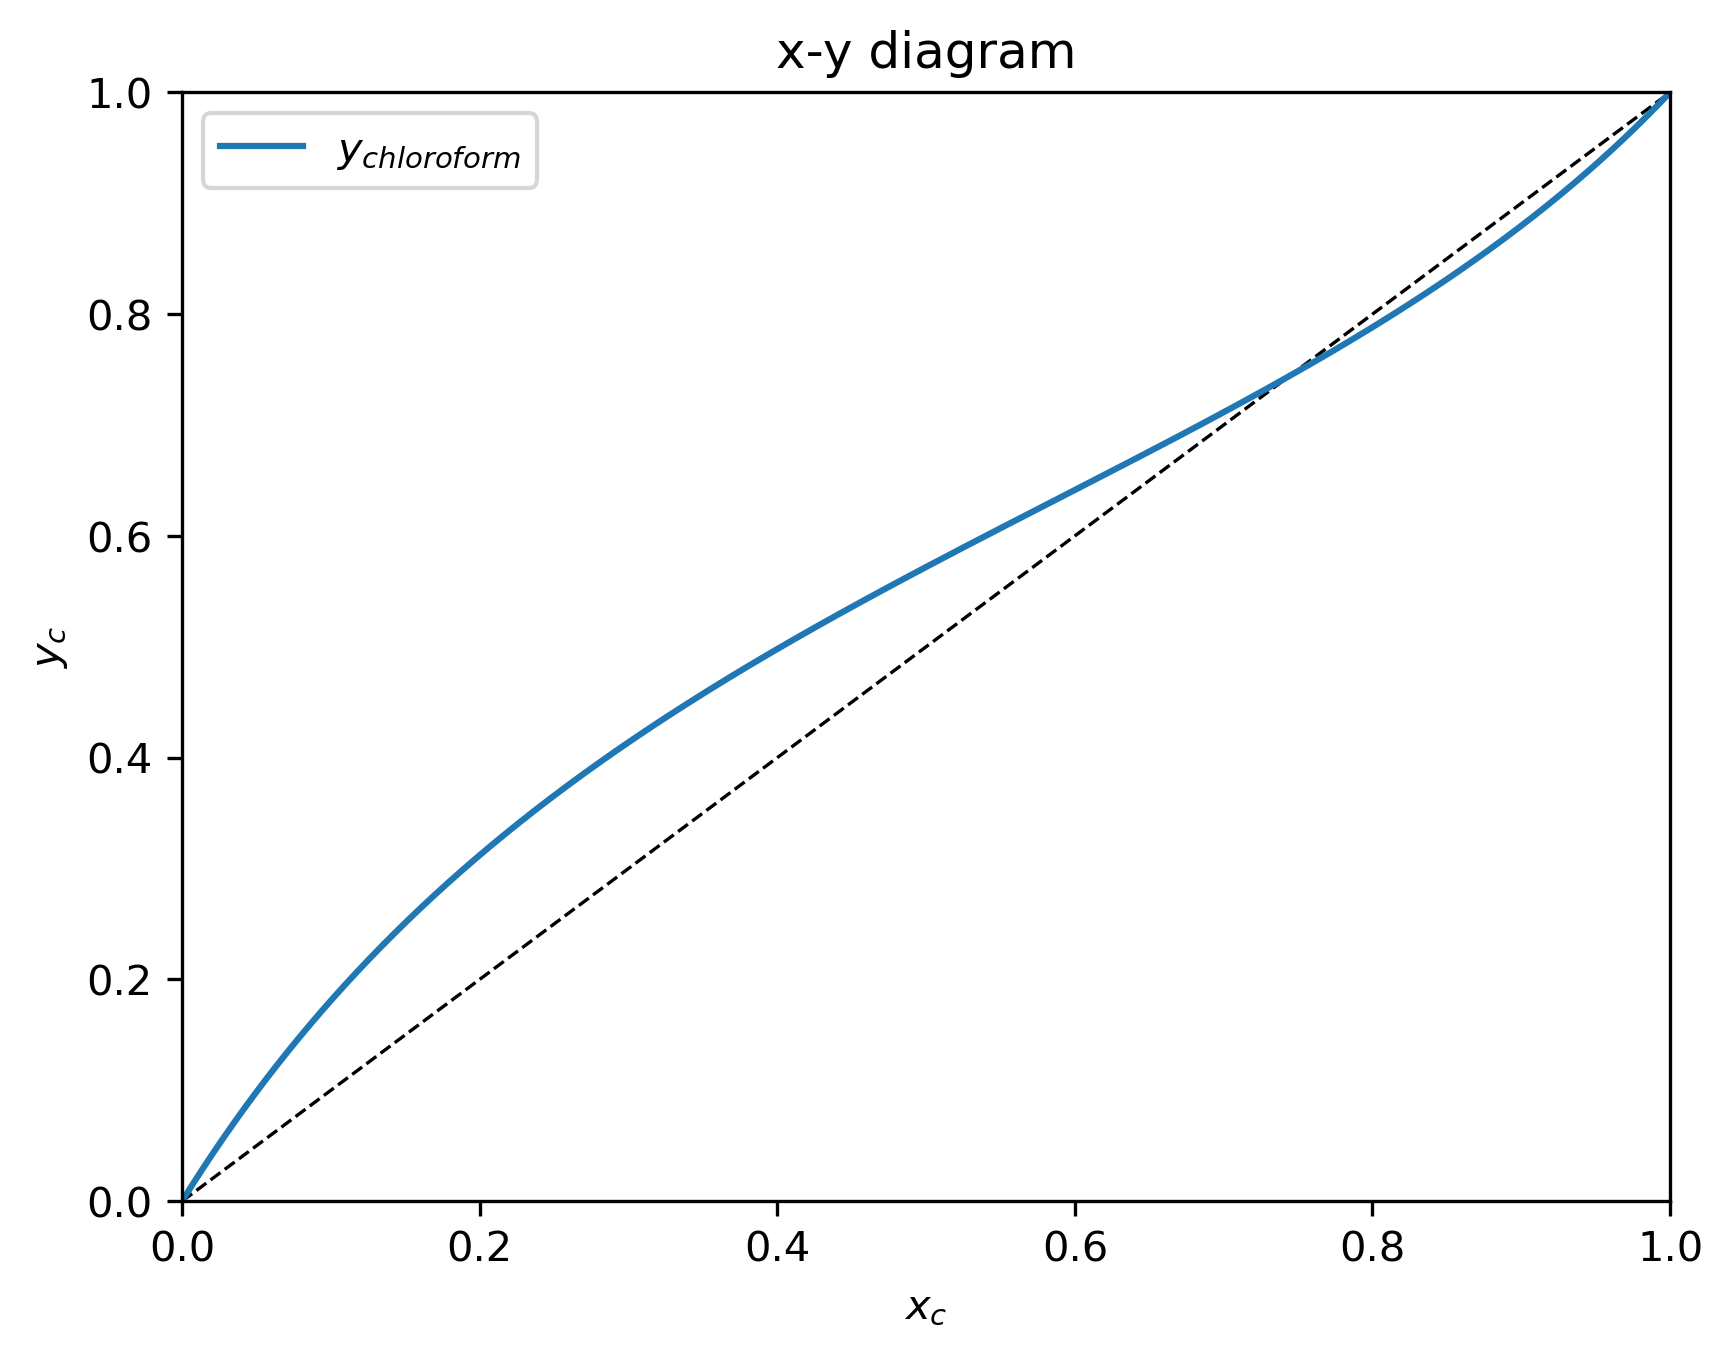

In [4]:
x1 = np.linspace(0.0001,0.9999,10000)
P = x1 * pvap1 * vanlaar_gamma1(x1) + (1-x1) * pvap2 * vanlaar_gamma2(x1)
y1 = x1 * pvap1 * vanlaar_gamma1(x1) / P

fig,ax = plt.subplots(dpi=300)
ax.plot(x1, P, label='P-x')
ax.plot(y1, P, label='P-y')
ax.set(xlim=(0,1), xlabel='$x_c$, $y_c$', ylabel='total pressure (bar)', title='P-x-y diagram')
ax.legend();

fig,ax = plt.subplots(dpi=300)
ax.plot(x1, x1, '--', c='black', linewidth=0.8)
ax.plot(x1, y1, label='$y_{chloroform}$')
ax.set(xlim=(0,1),ylim=(0,1), xlabel='$x_c$', ylabel='$y_c$', title='x-y diagram')
ax.legend();

# b

yes there is an azeotrope! we can find the pressure and composition of the azeotrope by finding the maximum pressure (we can tell that this is a maximum pressure azeotrope from the graph), and then we just find the composition that gives the maximum pressure.

In [5]:
azeotrope_p = np.max(P)
azeotrope_xc = x1[np.argmax(P)] # math 219 party trick
print(f'azeotrope pressure: {azeotrope_p:.3f} bar')
print(f'azeotrope x_chloroform: {azeotrope_xc:.3f}')

azeotrope pressure: 0.274 bar
azeotrope x_chloroform: 0.744


# c

here we can use the graph sandler uses in illustration 11.2-2 (shoutout to the TA who mentioned this one in a canvas annoucement)

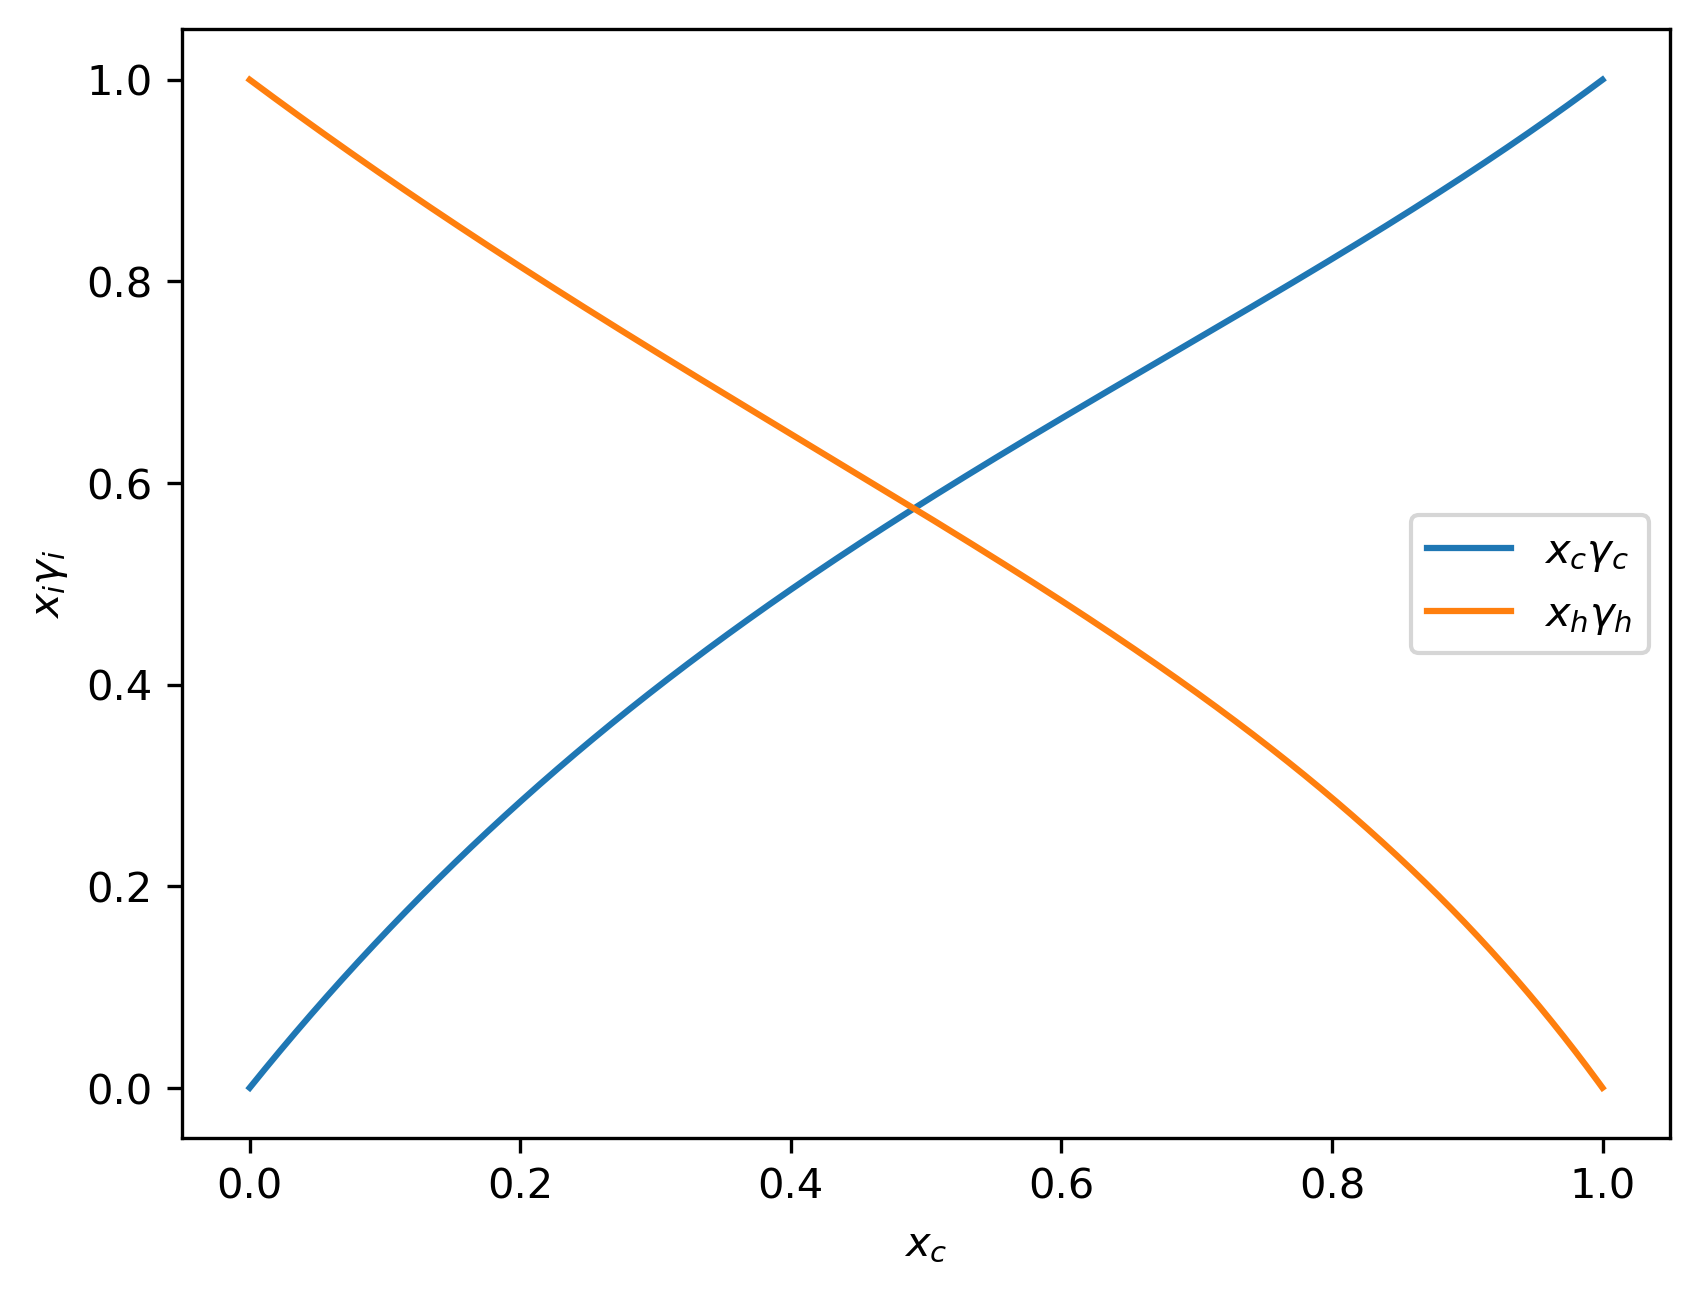

In [6]:
fig,ax = plt.subplots(dpi=300)
ax.plot(x1, x1*vanlaar_gamma1(x1))
ax.plot(x1, (1-x1)*vanlaar_gamma2(x1))
ax.set(xlabel='$x_c$', ylabel='$x_i \gamma_i$')
ax.legend(['$x_c \gamma_c$', '$x_h \gamma_h$']);

and we see that there is no LLE or VLLE since these both past the horizontal line test 

i.e. they wont fifill 

$$
x_i^{I} \gamma_i^{I} = x_i^{II} \gamma_i^{II}
$$

with two different values of $x_i$. no liquid-liquid phase separation occurs

# d

bringing back the Pxy diagram we can plot this path on it:

- starts at $x_c = 0.3455$ and $P=0.2555$ bar
- goes to $P=2$ bar

looking at where we start

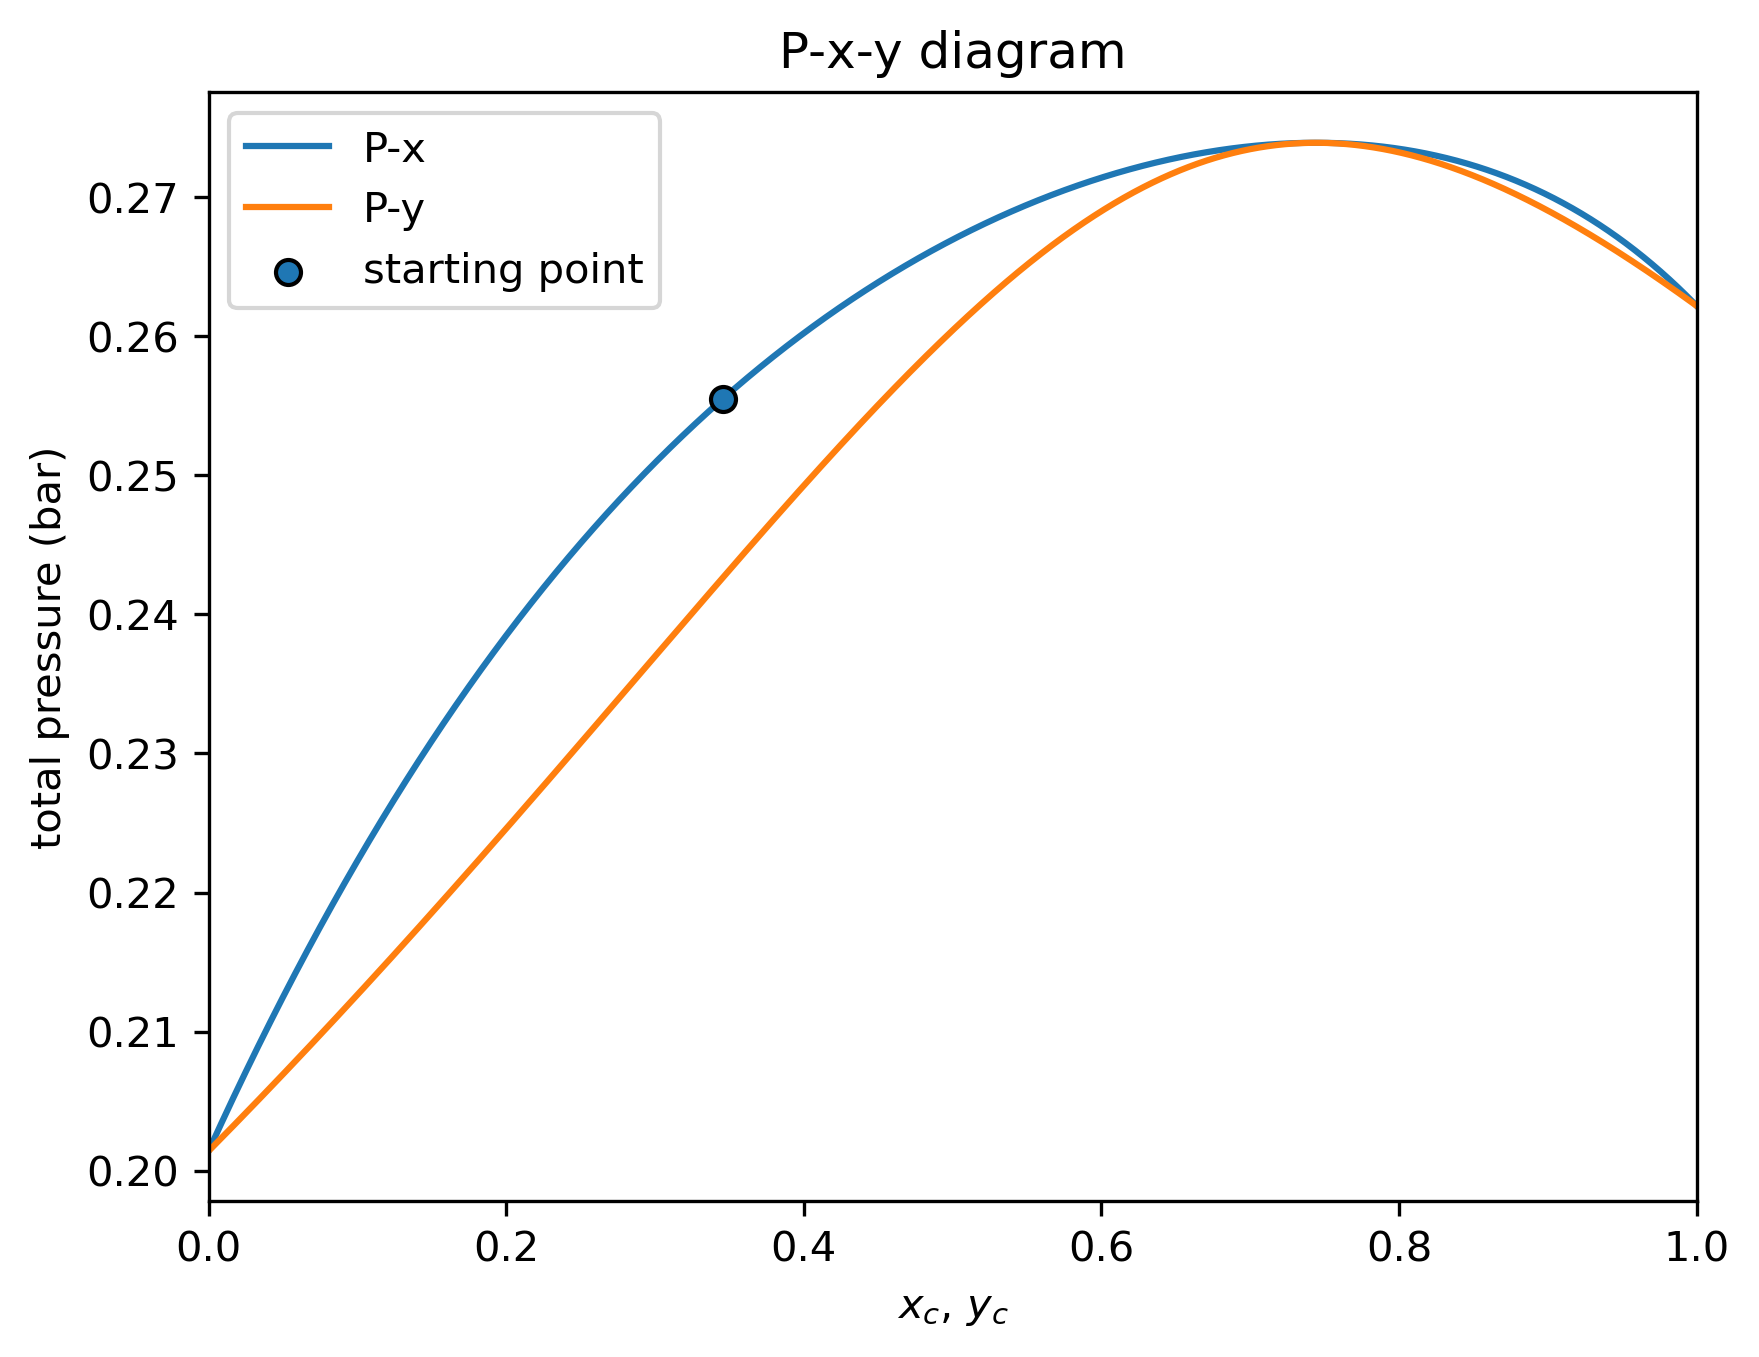

In [7]:
fig,ax = plt.subplots(dpi=300)
ax.plot(x1, P, label='P-x')
ax.plot(y1, P, label='P-y')
ax.scatter([0.3455,], [0.2555,], edgecolor='black', zorder=30, label='starting point')
ax.set(xlim=(0,1), xlabel='$x_c$, $y_c$', ylabel='total pressure (bar)', title='P-x-y diagram')
ax.legend();

we start right at the bubble point! this means when we start we have 2 phases and their compositions were literally given in the problem so I won't bother writing them here. then, when we start increasing the pressure we will be above the bubble point pressure and therefore have only one miscible liquid phase. i know its just one liquid phase since from earlier i saw that for this van laar modeled system there cannot be liquid liquid equlibrium at this temperature.

start

- vapor phase and liquid phase 
- $x_c = 0.3455, x_h = 0.6545$
- $y_c = 0.4538, y_h = 0.5462$

intermediate

- one liquid phase with composition $x_c = 0.3455, x_h = 0.6545$

In [8]:
# filler